# My first Deep Neural Network

### Activity from Chapter 2 of Generative Deep Learning, by David Foster

This example is loading the CIFAR-10 dataset, consisting of 60k images of 32 * 32 color pixels. There are 10 categories and each image is labeled with one category.

In [1]:
# Import statements
import numpy as np
from keras.utils import to_categorical
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Input, Flatten, Dense
from keras.models import Model

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
NUM_CLASSES = 10
PIXELS = 255.0

# Neural networks work best when in ranges of -1 to 1, that's why we divide by 255
x_train = x_train.astype('float32') / PIXELS
x_test = x_test.astype('float32') / PIXELS

y_train = to_categorical(y_train, NUM_CLASSES) # Changes the categories into one-hot vector [0,0,0,1,0]
y_test = to_categorical(y_test, NUM_CLASSES)

In [4]:
y_train[:10]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

### Sequential vs Functional API Architecture

In [5]:
model_seq = Sequential([
    Dense(200, activation = 'relu', input_shape=(32,32,3)),
    Flatten(),
    Dense(150, activation = 'relu'),
    Dense(10, activation= 'softmax'),
])

W0630 19:36:08.983575 4378084864 deprecation_wrapper.py:119] From /Users/alfredo.leon/opt/miniconda3/envs/gdl/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0630 19:36:09.013512 4378084864 deprecation_wrapper.py:119] From /Users/alfredo.leon/opt/miniconda3/envs/gdl/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0630 19:36:09.028063 4378084864 deprecation_wrapper.py:119] From /Users/alfredo.leon/opt/miniconda3/envs/gdl/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [6]:
input_layer = Input(shape=(32,32,3))
x = Flatten()(input_layer)
x = Dense(units=200, activation='relu')(x)
x = Dense(units=150, activation='relu')(x)
output_layer = Dense(units=10, activation='softmax')(x)
model_func = Model(input_layer, output_layer)

In [7]:
model_func.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 200)               614600    
_________________________________________________________________
dense_5 (Dense)              (None, 150)               30150     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1510      
Total params: 646,260
Trainable params: 646,260
Non-trainable params: 0
_________________________________________________________________


### Compile the model

In [8]:
from keras.optimizers import Adam
opt = Adam(lr=0.0005)
model_func.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

W0630 19:36:16.170072 4378084864 deprecation_wrapper.py:119] From /Users/alfredo.leon/opt/miniconda3/envs/gdl/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0630 19:36:16.177990 4378084864 deprecation_wrapper.py:119] From /Users/alfredo.leon/opt/miniconda3/envs/gdl/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



### Train the model 

In [9]:
model_func.fit(
    x_train, 
    y_train,
    batch_size=32,
    epochs=10,
    shuffle=True
)

W0630 19:36:49.861757 4378084864 deprecation.py:323] From /Users/alfredo.leon/opt/miniconda3/envs/gdl/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0630 19:36:49.911502 4378084864 deprecation_wrapper.py:119] From /Users/alfredo.leon/opt/miniconda3/envs/gdl/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/10
50000/50000 [==============================] - 11s 227us/step - loss: 1.8521 - acc: 0.3346
Epoch 2/10
50000/50000 [==============================] - 11s 219us/step - loss: 1.6624 - acc: 0.4052
Epoch 3/10
50000/50000 [==============================] - 11s 220us/step - loss: 1.5786 - acc: 0.4385
Epoch 4/10
50000/50000 [==============================] - 11s 215us/step - loss: 1.5285 - acc: 0.4533
Epoch 5/10
50000/50000 [==============================] - 11s 219us/step - loss: 1.4900 - acc: 0.4694
Epoch 6/10
50000/50000 [==============================] - 11s 218us/step - loss: 1.4575 - acc: 0.4814
Epoch 7/10
50000/50000 [==============================] - 11s 219us/step - loss: 1.4320 - acc: 0.4897
Epoch 8/10
50000/50000 [==============================] - 11s 218us/step - loss: 1.4094 - acc: 0.4985
Epoch 9/10
50000/50000 [==============================] - 11s 227us/step - loss: 1.3909 - acc: 0.5037
Epoch 10/10
50000/50000 [==============================] - 11s 230us/step - loss: 

### Evaluating the model

In [11]:
model_func.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 53us/step


[1.4500603324890138, 0.4817]

In [12]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 
                    'frog', 'horse', 'ship', 'truck'])
preds = model_func.predict(x_test) # Array of shape 10000, 10. A vector of 10 class probs for each observation
preds_single = CLASSES[np.argmax(preds, axis=-1)] # Convert the array back into a single prediction
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

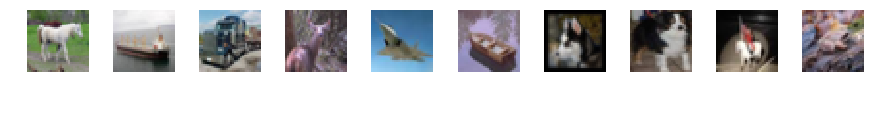

In [16]:
import matplotlib.pyplot as plt
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)
fig = plt.figure(figsize=(15,3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, 
            ha='center', transform=ax.transAxes, color='white')
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, 
            ha='center', transform=ax.transAxes, color='white')
    ax.imshow(img)